<a href="https://colab.research.google.com/github/Vaibhav21pandit/Pytorch_Rally/blob/master/Torch_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Experiment-1 Torch Playground (expolore torch modules(vision as of now), the APIs and modules exposed etc)

In [ ]:
import torch 
import numpy as np

In [ ]:
x=torch.tensor(5)
w=torch.tensor(7.,requires_grad=True)
b=torch.tensor(120.,requires_grad=True)
y=w*x+b

In [ ]:
y.backward()

In [ ]:
# y.detach().numpy()

Playing with tensor shapes

In [ ]:
x=torch.tensor([[1,2,3],
                [4,5,6],
                [7,8,9],]).cuda()

In [ ]:
x.clamp_()

torch.return_types.sort(values=tensor([2, 5, 6]), indices=tensor([2, 1, 0]))

**REGRESSION**

In [ ]:
# y=(w1*x1)+(w2*x2)+(w3*x3)+b
y_target=np.array([515,98,35])
y_target=np.reshape(y_target,(3,1))
y_target=torch.tensor(y_target)
x=np.array([[87,134,58],
            [102,300,37],
            [69,96,70]],dtype='float32')
x=torch.from_numpy(x)
w=torch.randn(2,3,requires_grad=True)


In [ ]:
w

tensor([[-1.2149,  0.7196,  0.5193],
        [ 1.1107, -0.0538, -0.3582]], requires_grad=True)

In [ ]:
def model(x,w):
 return (x@w.t())


In [ ]:
def loss_func(preds,targs):
  return torch.sum((targs-preds)**2)/len(preds)

In [ ]:
# for i in range(10):
#   preds=model(x,w)
#   loss=loss_func(preds,y_target)
#   print(f'--->predictions:{preds} & loss:{loss}')
#   loss.backward()
#   with torch.no_grad():
#     w-=w.grad*(1e-04)
#   w.grad.zero_()

MNIST with Torch and numpy

In [ ]:
import torch
from torchvision import datasets
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
import torch.optim as optim
import torch.nn.functional as F

In [ ]:
import gzip
import pickle
!wget "http://deeplearning.net/data/mnist/mnist.pkl.gz"
with gzip.open(('./mnist.pkl.gz'), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

--2020-09-19 07:32:04--  http://deeplearning.net/data/mnist/mnist.pkl.gz
Resolving deeplearning.net (deeplearning.net)... 132.204.26.28
Connecting to deeplearning.net (deeplearning.net)|132.204.26.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16168813 (15M) [application/x-gzip]
Saving to: ‘mnist.pkl.gz.1’

mnist.pkl.gz.1      100%[===================>]  15.42M  4.52MB/s    in 3.4s    

2020-09-19 07:32:08 (4.52 MB/s) - ‘mnist.pkl.gz.1’ saved [16168813/16168813]



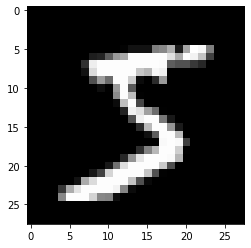

In [ ]:
plt.imshow(x_train[0].reshape((28,28)),cmap='gray')

In [ ]:
(x_train, y_train, x_valid, y_valid)=(map(torch.tensor,(x_train, y_train, x_valid, y_valid)))

from torch.utils.data import DataLoader,TensorDataset
data={
    'train':torch.utils.data.TensorDataset(x_train,y_train),
    'val':TensorDataset(x_valid,y_valid)
}
dataloader={
    'train':DataLoader(data['train'],5,shuffle=True),
    'val':DataLoader(data['val'],3)
}

In [ ]:
# | Linear Model defined and trained |

In [ ]:
#defining a Linear NN

class LinearNN(nn.Module):
  def __init__(self):
    super(LinearNN,self).__init__()
    self.flat=nn.Flatten()
    self.L1=nn.Linear(784,480)
    self.L2=nn.Linear(480,128)
    self.L3=nn.Linear(128,10)
  def forward(self,x):
    x=self.flat(x)
    x=self.L1(x)
    x=F.tanh(x)
    x=self.L2(x)
    x=F.tanh(x)
    x=self.L3(x)
    output = F.softmax(x, dim=1)
    return output
model=LinearNN().cuda()

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.1)

In [ ]:
def train(num_epochs=100):
  for inputs,labels in dataloader['train']:
    model.train()
    outputs=model(inputs)
    loss=criterion(outputs,labels)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    model.eval()
    with torch.no_grad():
      valid_loss = sum(criterion(model(xb), yb) for xb, yb in dataloader['val'])
      print(valid_loss)


In [ ]:
train()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1614: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


tensor(7672.8008)
tensor(7672.5503)
tensor(7671.8789)
tensor(7671.4580)
tensor(7670.6431)
tensor(7669.8511)
tensor(7669.2246)
tensor(7668.5112)


KeyboardInterrupt: ignored

In [ ]:
x=x_valid[0].unsqueeze(0)
model(x)

In [ ]:
plt.imshow(x_valid[0].reshape((28,28)),cmap='gray')

MNIST with CNN

In [ ]:
data['train'][0][0].shape

torch.Size([784])

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(self,CNN).__init__():
    self.conv1=nn.Conv2d(3,10,3)
    self.conv2=nn.MaxPool2d(3)



Experiment-3 

TorchVision

In [ ]:
import torchvision
from torch import nn,optim
import torch
from torchvision import transforms,datasets,models
from torch.utils.data import DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt
from PIL import Image
import torch.autograd.profiler as profiler

Classification Problem

In [ ]:
# !wget --no-check-certificate \
#     https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
#     -O /content/cats_and_dogs_filtered.zip
# !unzip cats_and_dogs_filtered.zip


In [ ]:
tf={
    'train':transforms.Compose([
                          transforms.Resize((128,128)),
                          transforms.RandomPerspective(),
                          transforms.RandomGrayscale(p=0.3),
                          transforms.ToTensor(),
                          transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
      ]),

    'val':transforms.Compose([
                              transforms.Resize(128),
                              transforms.ToTensor(),
                              transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
      ])
}

In [ ]:
dataset={
    'train':datasets.ImageFolder('/content/cats_and_dogs_filtered/train',transform=tf['train']),
    'val':datasets.ImageFolder('/content/cats_and_dogs_filtered/validation',transform=tf['val'])
}

dataLoaders={
    'train':DataLoader(dataset['train'],batch_size=10,shuffle=True,),
    'val':DataLoader(dataset['val'],batch_size=10,shuffle=False)
}


Model1-MobileNet

In [ ]:
model=models.resnet18(pretrained=True).cuda()
for parameter in model.parameters():
  parameter.set_trainable=False

model.fc=nn.Sequential(
    nn.Linear(512,256),
    nn.ReLU(inplace=False),
    nn.Linear(256,2)).cuda()

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


RuntimeError: ignored

In [ ]:
models.resnet18().parameters

Model-2 Custom CNN

In [ ]:
class NeuralNet(nn.Module):
  def __init__(self):
    super(NeuralNet,self).__init__()
    self.conv1=nn.Conv2d(3,6,5)
    self.pool1=nn.MaxPool2d(3,3)
    self.conv2=nn.Conv2d(6,16,5)
    self.fc1=nn.Linear((16*5*5),120)
    self.fc2=nn.Linear(120,2)
  def forward(self,x):
    x=nn.ReLU(self.conv1())
    x=self.pool1
Model=NeuralNet

In [ ]:
#Loss_func and Optimizer
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.fc.parameters(),lr=0.001)

In [ ]:
#Training Loop
def Train(criterion,optimizer,num_epochs=10):
  for epoch in range(num_epochs):
    for inputs,labels in dataLoaders['train']:
      inputs=inputs.cuda()
      labels=labels.cuda()
      outputs=model(inputs).cuda()
      loss=criterion(outputs,labels)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

In [ ]:
%time Train(criterion,optimizer,num_epochs=2)

CPU times: user 26.8 s, sys: 743 ms, total: 27.5 s
Wall time: 27.6 s


In [ ]:
from PIL import Image
cat=Image.open('/content/cats_and_dogs_filtered/validation/cats/cat.2343.jpg')
tf=transforms.Compose([transforms.Resize((128,128)),
                       transforms.ToTensor(),
                       transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),])
cat=tf(cat)
cat=cat.cuda()
cat=torch.unsqueeze(cat,0)


In [ ]:
def inference(input):
  result=model(cat)
  result=torch.softmax(result,1)
  result=torch.argmax(result)
  print(result)
  if result==0:
    print('cat')
  else:
    print('dog')
  

In [ ]:
inference(cat)

tensor(0, device='cuda:0')
cat


In [ ]:
with profiler.profile(record_shapes=True) as prof:
    with profiler.record_function("model_inference"):
        model(cat)

In [ ]:
print(prof.key_averages(),prof.profile_memory,prof.self_cpu_time_total)

---------------------------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  
Name                               Self CPU total %  Self CPU total   CPU total %      CPU total        CPU time avg     Number of Calls  
---------------------------------  ---------------  ---------------  ---------------  ---------------  ---------------  ---------------  
model_inference                    38.36%           11.672ms         100.00%          30.427ms         30.427ms         1                
conv2d                             1.19%            362.855us        23.40%           7.119ms          136.898us        52               
convolution                        0.63%            191.417us        22.20%           6.756ms          129.920us        52               
_convolution                       3.90%            1.188ms          21.57%           6.564ms          126.239us        52               
size                             